In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from textblob import TextBlob
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
ruta = r'../Yelp/reviews_parte1.csv'



In [3]:
df = pd.read_csv(ruta)

In [4]:
df.head(3)

,business_id,stars,text,date
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03


In [5]:
df.describe()

,stars
count,2063875.000
mean,3.768
std,1.490
min,1.000
25%,3.000
50%,4.000
75%,5.000
max,5.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063875 entries, 0 to 2063874
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   business_id  object
 1   stars        int64 
 2   text         object
 3   date         object
dtypes: int64(1), object(3)
memory usage: 63.0+ MB


In [7]:
#VERIFICAMOS QUE LA COLUMNA DATE TENGA TIPO DE DATO DATETIME
df['date'] = pd.to_datetime(df['date'])

#creamos una columna con años
df['year'] = df['date'].dt.year

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063875 entries, 0 to 2063874
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   business_id  object        
 1   stars        int64         
 2   text         object        
 3   date         datetime64[ns]
 4   year         int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 70.9+ MB


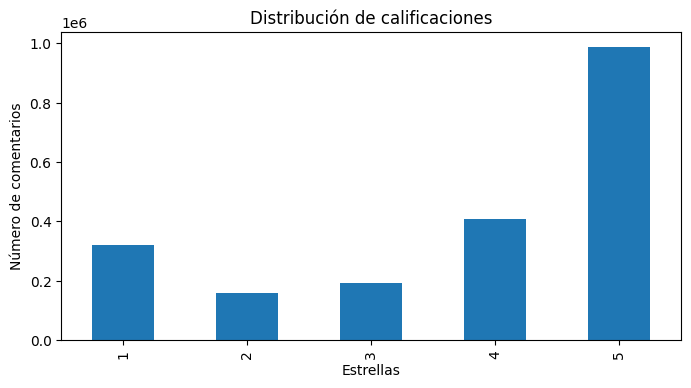

In [15]:
plt.figure(figsize=(8, 4))
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de calificaciones')
plt.xlabel('Estrellas')
plt.ylabel('Número de comentarios')
plt.show()

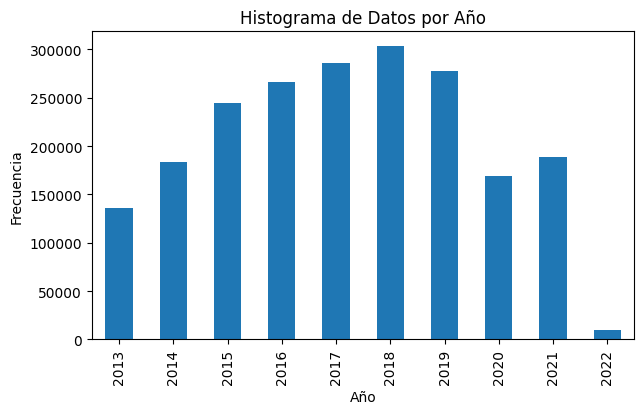

In [20]:
plt.figure(figsize=(7, 4))
df['year'].value_counts().sort_index().plot(kind='bar')
# Añadir títulos y etiquetas
plt.title('Histograma de Datos por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

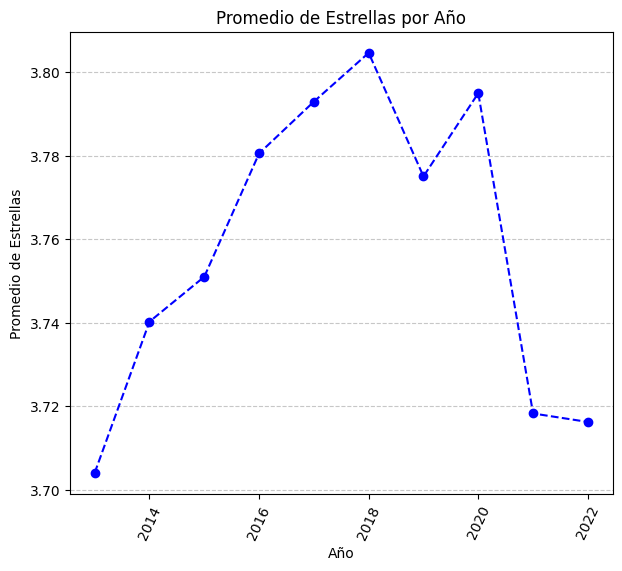

In [19]:
# Calcular el promedio de estrellas por año
average_stars_per_year = df.groupby('year')['stars'].mean().reset_index()

# Crear el gráfico de barras para mostrar el promedio de estrellas por año
plt.figure(figsize=(7, 6))
plt.plot(average_stars_per_year['year'], average_stars_per_year['stars'], linestyle='--', marker='o', color='blue')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Año')
plt.ylabel('Promedio de Estrellas')
plt.title('Promedio de Estrellas por Año')

plt.show()